Simple binary classification using perceptron (Simple step Function) for XOR gate

Trained weights: [ 0.43396465  0.31828438 -1.35034423]


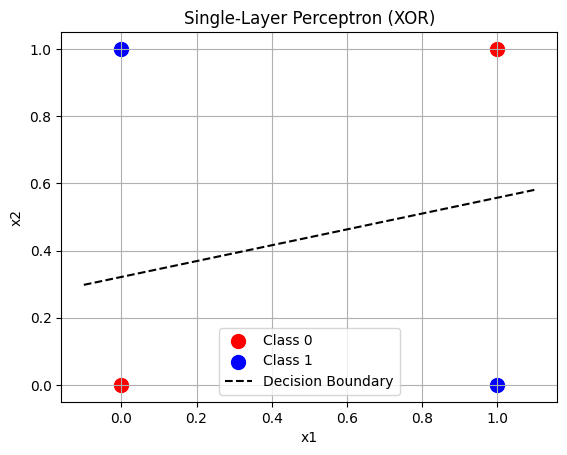

In [46]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])


X_bias = np.hstack((np.ones((X.shape[0], 1)), X)) 

# Activation-Sigmoid Function
def activation(z):
    return 1/(1+np.exp(-z))


lr = 0.1
epochs = 10
weights = np.random.randn(3)


for epoch in range(epochs):
    for i in range(len(X_bias)):
        z = np.dot(X_bias[i], weights)
        y_pred = activation(z)
        error = y[i] - y_pred
        weights += lr * error * X_bias[i]
        
print("Trained weights:", weights)

## Decision_boundary
def plot_decision_boundary(X, y, weights):
    for i in range(len(y)):
        plt.scatter(X[i][0], X[i][1], c='red' if y[i] == 0 else 'blue', s=100, label=f'Class {y[i]}' if i < 2 else "")
    
    x_vals = np.linspace(-0.1, 1.1, 100)
    y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Single-Layer Perceptron (XOR)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, weights)


Simple classification using perceptron (sigmoid Function activation) for XOR gate, the output is wrong as by xor gate is non-linear i.e. it is not linearly sperable when we use simple perceptron method.

Trained weights: [-0.19475491  1.45500923  0.76972602 -2.19666214]

Actual vs Predicted:
Input: [0 0], Actual: 0, Predicted: 0
Input: [0 1], Actual: 1, Predicted: 1
Input: [1 0], Actual: 1, Predicted: 1
Input: [1 1], Actual: 0, Predicted: 0


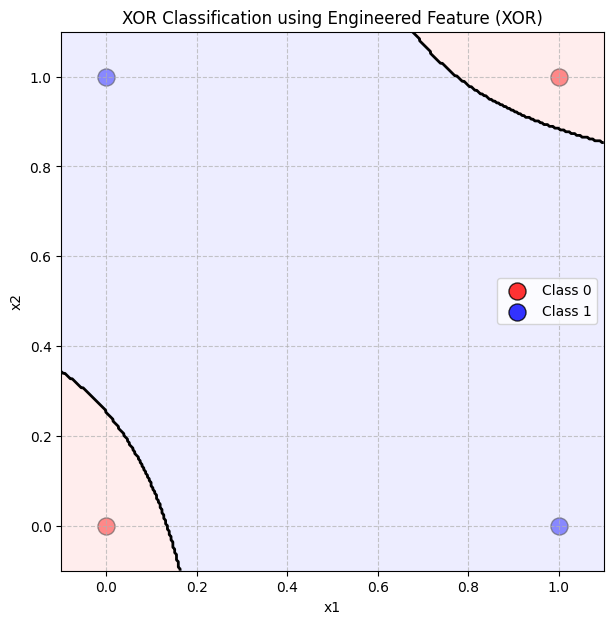

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# XOR inputs and outputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

# Feature engineering:x1, x2, x1*x2
x_mul = (X[:, 0] * X[:, 1]).reshape(-1, 1)
X_feat = np.hstack((X, x_mul))  # shape: (4, 3)
X_bias = np.hstack((np.ones((X_feat.shape[0], 1)), X_feat))  # shape: (4, 4)

def activation(z):
    return np.where(z >= 0, 1, 0)

# Initialize weights+bias
weights = np.random.randn(4)
lr = 0.1
epochs = 10

# Training loop
for epoch in range(epochs):
    for i in range(len(X_bias)):
        z = np.dot(X_bias[i], weights)
        y_pred = activation(z)
        error = y[i] - y_pred
        weights += lr * error * X_bias[i]

print("Trained weights:", weights)

# Prediction fn
def predict(X_input):
    x_mul = (X_input[:, 0] * X_input[:, 1]).reshape(-1, 1)
    X_feat = np.hstack((X_input, x_mul))
    X_bias = np.hstack((np.ones((X_feat.shape[0], 1)), X_feat))
    return activation(X_bias @ weights)

# Print actual vs predicted values
y_pred = predict(X)

print("\nActual vs Predicted:")
for i in range(len(y)):
    print(f"Input: {X[i]}, Actual: {y[i]}, Predicted: {y_pred[i]}")


def plot_decision_boundary_clear(X, y, weights):
    plt.figure(figsize=(7, 7))
    
    for label in np.unique(y):
        idx = np.where(y == label)
        plt.scatter(X[idx, 0], X[idx, 1],
                    color=['red', 'blue'][label],
                    label=f'Class {label}',
                    s=150, edgecolors='k', alpha=0.8)

    xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 300),
                         np.linspace(-0.1, 1.1, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    x_mul = (grid[:, 0] * grid[:, 1]).reshape(-1, 1)
    grid_feat = np.hstack((grid, x_mul))
    grid_bias = np.hstack((np.ones((grid_feat.shape[0], 1)), grid_feat))
    
    zz = activation(grid_bias @ weights).reshape(xx.shape)

    plt.contourf(xx, yy, zz, levels=[-0.1, 0.5, 1.1],
                 colors=['#ffdddd', '#ddddff'], alpha=0.5)
    plt.contour(xx, yy, zz, levels=[0.5], colors='k', linewidths=2)

    plt.title("XOR Classification using Engineered Feature (XOR)")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


plot_decision_boundary_clear(X, y, weights)



Trained weights:
 [-2.04456613  4.3329898   4.3329898  -9.14513967]

Actual vs Predicted:
Input: [0 0], Actual: 0, Predicted: 0
Input: [0 1], Actual: 1, Predicted: 1
Input: [1 0], Actual: 1, Predicted: 1
Input: [1 1], Actual: 0, Predicted: 0


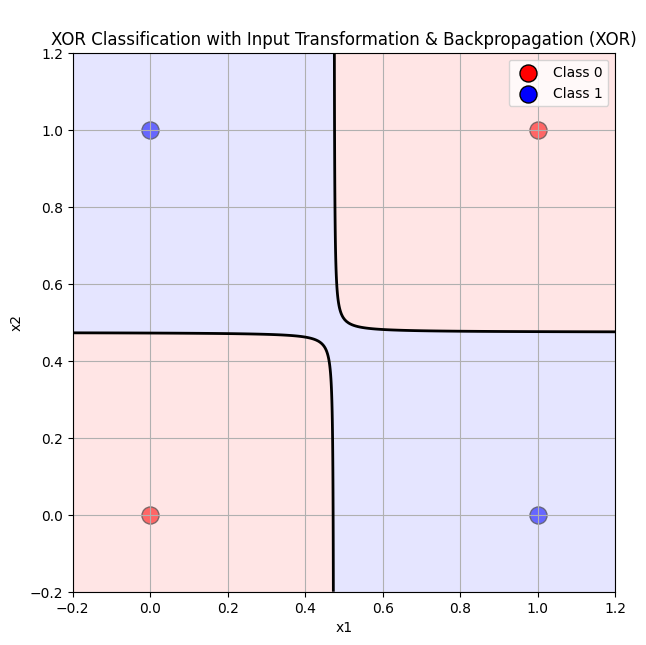

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# XOR Input and Output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

# Feature engineering:add x1*x2
x_m = (X[:, 0] * X[:, 1]).reshape(-1, 1)
X_f = np.hstack((X, x_m))  # shape (4, 3)
X_bias = np.hstack((np.ones((X_f.shape[0], 1)), X_f)) 

# Sigmoid and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Initialize weights+bias
weights = np.random.randn(4, 1) * 0.1
lr = 0.5
epochs = 1000

# Train using gradient descent
for epoch in range(epochs):
    z = X_bias @ weights
    y_pred = sigmoid(z)
    error = y - y_pred
    grad = X_bias.T @ (error * sigmoid_derivative(z))
    weights += lr * grad
    if epoch % 200 == 0:
        loss = np.mean(error**2)

print("\nTrained weights:\n", weights.flatten())

# Prediction function
def predict(X_input):
    x_mul = (X_input[:, 0] * X_input[:, 1]).reshape(-1, 1)
    X_feat = np.hstack((X_input, x_mul))
    X_bias_input = np.hstack((np.ones((X_feat.shape[0], 1)), X_feat))
    y_hat = sigmoid(X_bias_input @ weights)
    return (y_hat > 0.5).astype(int), y_hat

# Print actual and predicted values
y_pred_class, y_pred_prob = predict(X)
print("\nActual vs Predicted:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Actual: {y[i][0]}, Predicted: {y_pred_class[i][0]}")

# Plot decision boundary
def plot_decision_boundary(X, y, weights):
    plt.figure(figsize=(7, 7))
    for label in np.unique(y):
        idx = np.where(y == label)
        plt.scatter(X[idx, 0], X[idx, 1], 
                    c=['red', 'blue'][label], label=f'Class {label}', s=150, edgecolor='k')

    xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 300), np.linspace(-0.2, 1.2, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    x_mul = (grid[:, 0] * grid[:, 1]).reshape(-1, 1)
    grid_feat = np.hstack((grid, x_mul))
    grid_bias = np.hstack((np.ones((grid_feat.shape[0], 1)), grid_feat))
    zz = sigmoid(grid_bias @ weights).reshape(xx.shape)

    plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], colors=['#ffcccc', '#ccccff'], alpha=0.5)
    plt.contour(xx, yy, zz, levels=[0.5], colors='k', linewidths=2)
    plt.title("\nXOR Classification with Input Transformation & Backpropagation (XOR)")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y.flatten(), weights)


Actual vs Predicted:
Input: [0 0], Actual: 0, Predicted: 0
Input: [0 1], Actual: 1, Predicted: 1
Input: [1 0], Actual: 1, Predicted: 1
Input: [1 1], Actual: 0, Predicted: 0


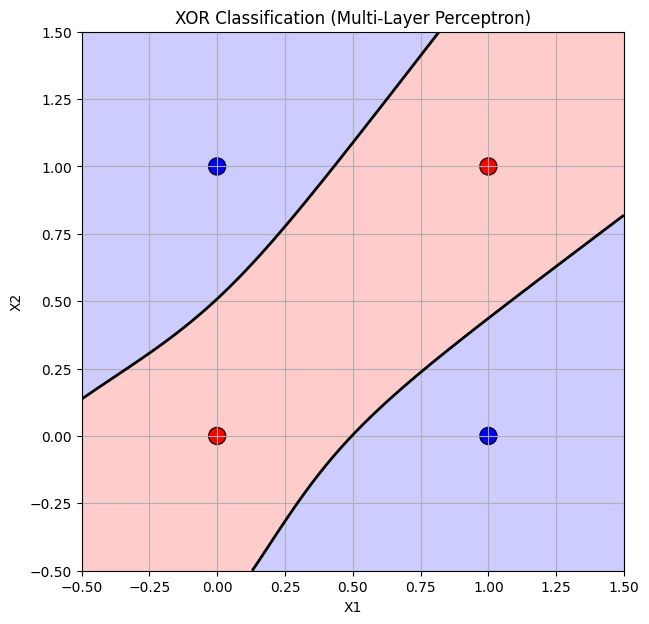

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# XOR Input and Output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

# NN Parameters
input_size = 2
hidden_size = 4  
output_size = 1
learning_rate = 0.1  
epochs = 20000  

# Initialize weights
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2./input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2./hidden_size)
b2 = np.zeros((1, output_size))


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Train loop
for epoch in range(epochs):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    # Backward propagation
    error = y - a2
    d_output = error * sigmoid_derivative(z2)
    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(z1)
    W2 += a1.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0) * learning_rate

# Prediction function
def predict(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return (a2 > 0.5).astype(int), a2

y_pred_class, y_pred_prob = predict(X)
print("Actual vs Predicted:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Actual: {y[i][0]}, Predicted: {y_pred_class[i][0]}")


plt.figure(figsize=(7, 7))
colors = ['red' if val == 0 else 'blue' for val in y.flatten()]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=150, edgecolor='k')
plt.title("XOR Classification (Multi-Layer Perceptron)")
plt.xlabel("X1")
plt.ylabel("X2")
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
_, grid_pred = predict(grid)
grid_pred = grid_pred.reshape(xx.shape)
plt.contourf(xx, yy, grid_pred, alpha=0.2, levels=[0, 0.5, 1], colors=['red', 'blue'])
plt.contour(xx, yy, grid_pred, levels=[0.5], colors='black', linewidths=2)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.show()